In [1]:
""" ===================================================  Load Packages =================================================== """
import numpy as np
import geopandas as gpd
import pandas as pd
import math
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os


""" ============================================== Figure Settings ==================================================== """

rcParams['font.family'] = 'Times New Roman'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.default'] = 'regular'
rcParams['mathtext.cal'] = 'Arial'
rcParams['legend.fontsize'] = 'medium'


""" =================================================  Define Function ================================================ """

# define function from str to float
def strlist_coversion_array(string):
    aa = string.split(', ')
    aa[0] = aa[0].split('[')[1]
    aa[-1] = aa[-1].split(']')[0]
    return np.float_(aa)

In [2]:
##================================================= Read file and data pre-processing ====================================##
influencing_factor_attribute = pd.read_csv('Excel/Resilience_influencing_factor_attribute.csv') 
influencing_factor_attribute['geometry'] = influencing_factor_attribute[['longitude', 'latitude']].values.tolist()
influencing_factor_attribute['geometry'] = influencing_factor_attribute['geometry'].apply(Point)
influencing_factor_attribute = gpd.GeoDataFrame(influencing_factor_attribute)
resilience_influencing_factor_attribute = influencing_factor_attribute.copy()

resilience_influencing_factor_attribute = resilience_influencing_factor_attribute.drop(columns = ['state', 'lane_type', 'latitude', 'longitude'], axis = 1).set_index('zone_id')
resilience_influencing_factor_attribute = resilience_influencing_factor_attribute.iloc[:,0:-1]
resilience_influencing_factor_attribute.head()

,road,direction,length,LND,geometry,POP_DEN,MALE,WHITE,AGE,EDUCATION,...,CAR_OWNERSHIP,HU_DEN,EM_DEN,LU_DIVERSITY,HG_DEN,MR_DEN,Clustering_Coefficient,Degree_Centrality,Closeness_Centrality,resilience
zone_id,,,,,,,,,,,,,,,,,,,,,
8715,I-95,North,0.27,0.434109,POINT (-80.20916 25.90513),988.049075,29.360145,32.275201,2379.848087,160.875545,...,87.837739,432.889025,494.079417,101.169422,0.535562,0.535563,0.250000,0.002714,0.002714,-0.156993
8726,I-395,East,0.35,0.856589,POINT (-80.20106 25.78843),1926.707137,39.380090,50.719901,3129.017530,221.029722,...,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714,-0.057522
8727,I-395,East,0.35,0.856589,POINT (-80.20106 25.78843),1926.707137,39.380090,50.719901,3129.017530,221.029722,...,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714,0.007867
8728,I-395,East,0.35,0.856589,POINT (-80.20106 25.78843),1926.707137,39.380090,50.719901,3129.017530,221.029722,...,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714,-0.114100
8747,I-95,North,0.37,0.375969,POINT (-80.21039 25.91485),953.257027,28.724260,31.383251,2326.579307,157.727153,...,85.944235,418.406079,475.788674,99.881308,0.530235,0.530236,0.166667,0.004071,0.004342,-0.136130


In [3]:
print(resilience_influencing_factor_attribute.info())
print(resilience_influencing_factor_attribute.isnull().sum())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 738 entries, 8715 to 14747
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   road                    738 non-null    object  
 1   direction               738 non-null    object  
 2   length                  738 non-null    float64 
 3   LND                     738 non-null    float64 
 4   geometry                738 non-null    geometry
 5   POP_DEN                 738 non-null    float64 
 6   MALE                    738 non-null    float64 
 7   WHITE                   738 non-null    float64 
 8   AGE                     738 non-null    float64 
 9   EDUCATION               738 non-null    float64 
 10  CAR_COMMUTE             738 non-null    float64 
 11  INCOME                  738 non-null    float64 
 12  CAR_OWNERSHIP           738 non-null    float64 
 13  HU_DEN                  738 non-null    float64 
 14  EM_DEN       

Text(43.50000000000006, 0.5, 'Latitude')

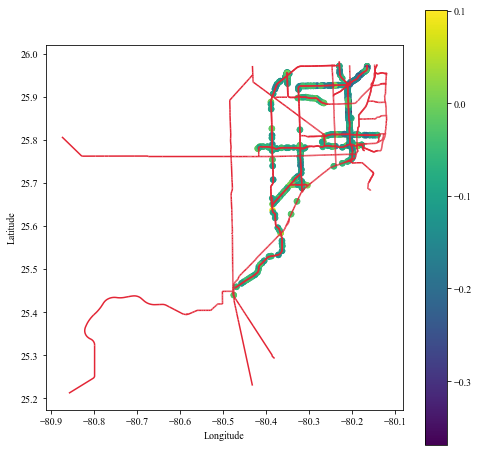

In [4]:
""" =================================  Visualization =================================== """
data_uniform_miami_highway_network = gpd.read_file('Data/Highway.geojson')

fig, ax = plt.subplots(1, figsize=(8,8))
divider = make_axes_locatable(ax)
base2 =data_uniform_miami_highway_network.plot(ax=ax, color='#e32636')
resilience_influencing_factor_attribute.plot(column='resilience', ax=base2, markersize=30,  legend=True) # Plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [5]:
""" =================================  Data Preprocessing =================================== """

' =================================  Data Preprocessing =================================== '

In [6]:
# Pre-processing for categorical data

## convert road type into standard (not including number)
road_str_list = ['I-', 'SR-', 'Express']
road_type_list = ['Interstate Highway', 'State Road', 'Expressway']
for i in range (len(road_str_list)):
    influencing_factor_attribute['road'].iloc[influencing_factor_attribute['road'].str.contains(road_str_list[i])] = road_type_list[i]
    resilience_influencing_factor_attribute['road'].iloc[resilience_influencing_factor_attribute['road'].str.contains(road_str_list[i])] = road_type_list[i]

## find the unique value for road type and lane direction
road_list = resilience_influencing_factor_attribute.road.unique()
direction_list = resilience_influencing_factor_attribute.direction.unique()

resilience_influencing_factor_attribute.head()

C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_36360\2943003694.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  influencing_factor_attribute['road'].iloc[influencing_factor_attribute['road'].str.contains(road_str_list[i])] = road_type_list[i]
C:\Users\Kaifa Lu\AppData\Local\Temp\ipykernel_36360\2943003694.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resilience_influencing_factor_attribute['road'].iloc[resilience_influencing_factor_attribute['road'].str.contains(road_str_list[i])] = road_type_list[i]


,road,direction,length,LND,geometry,POP_DEN,MALE,WHITE,AGE,EDUCATION,...,CAR_OWNERSHIP,HU_DEN,EM_DEN,LU_DIVERSITY,HG_DEN,MR_DEN,Clustering_Coefficient,Degree_Centrality,Closeness_Centrality,resilience
zone_id,,,,,,,,,,,,,,,,,,,,,
8715,Interstate Highway,North,0.27,0.434109,POINT (-80.20916 25.90513),988.049075,29.360145,32.275201,2379.848087,160.875545,...,87.837739,432.889025,494.079417,101.169422,0.535562,0.535563,0.250000,0.002714,0.002714,-0.156993
8726,Interstate Highway,East,0.35,0.856589,POINT (-80.20106 25.78843),1926.707137,39.380090,50.719901,3129.017530,221.029722,...,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714,-0.057522
8727,Interstate Highway,East,0.35,0.856589,POINT (-80.20106 25.78843),1926.707137,39.380090,50.719901,3129.017530,221.029722,...,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714,0.007867
8728,Interstate Highway,East,0.35,0.856589,POINT (-80.20106 25.78843),1926.707137,39.380090,50.719901,3129.017530,221.029722,...,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714,-0.114100
8747,Interstate Highway,North,0.37,0.375969,POINT (-80.21039 25.91485),953.257027,28.724260,31.383251,2326.579307,157.727153,...,85.944235,418.406079,475.788674,99.881308,0.530235,0.530236,0.166667,0.004071,0.004342,-0.136130


In [7]:
## road: Interstate Highway (5), State Road(4), Expressway(3), US-1(2),Floridas Turnpike (1), Central Boulevard(0)
resilience_influencing_factor_attribute['road'] = resilience_influencing_factor_attribute['road'].replace('Interstate Highway', 5)
resilience_influencing_factor_attribute['road'] = resilience_influencing_factor_attribute['road'].replace('State Road', 4)
resilience_influencing_factor_attribute['road'] = resilience_influencing_factor_attribute['road'].replace('Expressway', 3)
resilience_influencing_factor_attribute['road'] = resilience_influencing_factor_attribute['road'].replace('US-1', 2)
resilience_influencing_factor_attribute['road'] = resilience_influencing_factor_attribute['road'].replace('Floridas Turnpike', 1)
resilience_influencing_factor_attribute['road'] = resilience_influencing_factor_attribute['road'].replace('Central Boulevard', 0)

## direction: North (3), South(2), West(1), East(0)
resilience_influencing_factor_attribute['direction'] = resilience_influencing_factor_attribute['direction'].replace('North', 3)
resilience_influencing_factor_attribute['direction'] = resilience_influencing_factor_attribute['direction'].replace('South', 2)
resilience_influencing_factor_attribute['direction'] = resilience_influencing_factor_attribute['direction'].replace('West', 1)
resilience_influencing_factor_attribute['direction'] = resilience_influencing_factor_attribute['direction'].replace('East', 0)

# drop "geometry"
resilience_influencing_factor_attribute = resilience_influencing_factor_attribute.drop('geometry', axis=1)

resilience_influencing_factor_attribute.head()

,road,direction,length,LND,POP_DEN,MALE,WHITE,AGE,EDUCATION,CAR_COMMUTE,...,CAR_OWNERSHIP,HU_DEN,EM_DEN,LU_DIVERSITY,HG_DEN,MR_DEN,Clustering_Coefficient,Degree_Centrality,Closeness_Centrality,resilience
zone_id,,,,,,,,,,,,,,,,,,,,,
8715,5,3,0.27,0.434109,988.049075,29.360145,32.275201,2379.848087,160.875545,49.945226,...,87.837739,432.889025,494.079417,101.169422,0.535562,0.535563,0.250000,0.002714,0.002714,-0.156993
8726,5,0,0.35,0.856589,1926.707137,39.380090,50.719901,3129.017530,221.029722,60.046939,...,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714,-0.057522
8727,5,0,0.35,0.856589,1926.707137,39.380090,50.719901,3129.017530,221.029722,60.046939,...,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714,0.007867
8728,5,0,0.35,0.856589,1926.707137,39.380090,50.719901,3129.017530,221.029722,60.046939,...,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714,-0.114100
8747,5,3,0.37,0.375969,953.257027,28.724260,31.383251,2326.579307,157.727153,48.969665,...,85.944235,418.406079,475.788674,99.881308,0.530235,0.530236,0.166667,0.004071,0.004342,-0.136130


In [8]:
resilience_influencing_factor_attribute.columns

Index(['road', 'direction', 'length', 'LND', 'POP_DEN', 'MALE', 'WHITE', 'AGE',
       'EDUCATION', 'CAR_COMMUTE', 'INCOME', 'CAR_OWNERSHIP', 'HU_DEN',
       'EM_DEN', 'LU_DIVERSITY', 'HG_DEN', 'MR_DEN', 'Clustering_Coefficient',
       'Degree_Centrality', 'Closeness_Centrality', 'resilience'],
      dtype='object')

In [9]:
## Normalization for numberical data rather than standardization

#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#resilience_factor_normalized = resilience_influencing_factor_attribute.copy()
#resilience_factor_normalized.iloc[:,0:-1] = scaler.fit_transform(resilience_factor_normalized.iloc[:,0:-1].to_numpy())
#resilience_factor_normalized.head()

In [10]:
""" =================================  Training, Validation, and Testing Dataset =================================== """

from sklearn.model_selection import train_test_split

resilience_factor_model = resilience_influencing_factor_attribute.copy()
resilience_factor_model = resilience_factor_model.drop('resilience', axis=1)

X = resilience_factor_model.copy()
Y = resilience_influencing_factor_attribute['resilience'] ## resilience

In [11]:
X.head()

,road,direction,length,LND,POP_DEN,MALE,WHITE,AGE,EDUCATION,CAR_COMMUTE,INCOME,CAR_OWNERSHIP,HU_DEN,EM_DEN,LU_DIVERSITY,HG_DEN,MR_DEN,Clustering_Coefficient,Degree_Centrality,Closeness_Centrality
zone_id,,,,,,,,,,,,,,,,,,,,
8715,5,3,0.27,0.434109,988.049075,29.360145,32.275201,2379.848087,160.875545,49.945226,151.635032,87.837739,432.889025,494.079417,101.169422,0.535562,0.535563,0.250000,0.002714,0.002714
8726,5,0,0.35,0.856589,1926.707137,39.380090,50.719901,3129.017530,221.029722,60.046939,197.293588,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714
8727,5,0,0.35,0.856589,1926.707137,39.380090,50.719901,3129.017530,221.029722,60.046939,197.293588,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714
8728,5,0,0.35,0.856589,1926.707137,39.380090,50.719901,3129.017530,221.029722,60.046939,197.293588,95.532036,1026.345883,1065.694912,146.300120,0.556313,0.556314,0.250000,0.002714,0.002714
8747,5,3,0.37,0.375969,953.257027,28.724260,31.383251,2326.579307,157.727153,48.969665,148.217404,85.944235,418.406079,475.788674,99.881308,0.530235,0.530236,0.166667,0.004071,0.004342


In [12]:
Y.head()

zone_id
8715   -0.156993
8726   -0.057522
8727    0.007867
8728   -0.114100
8747   -0.136130
Name: resilience, dtype: float64

In [13]:
## ========================================================= BART Model ===================================================##

In [14]:
## ======================================================= BART Model ================================================ ##
from pathlib import Path

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb

RANDOM_SEED = 5781
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [15]:
with pm.Model() as model_bikes:
    σ = pm.ChiSquared("σ", 3)
    ε = pm.HalfNormal("ε", abs(σ))
    μ = pmb.BART("μ", X, Y, m = 200)
    y = pm.Normal("y", μ, abs(ε), observed=Y)
    idata_resilience = pm.sample(random_seed=RANDOM_SEED)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ, ε]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17031 seconds.


In [16]:
plt.rc('font', size=8)

D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\arviz\plots\hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\arviz\plots\hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)
D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\arviz\plots\hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_

array([<AxesSubplot:xlabel='road'>, <AxesSubplot:xlabel='direction'>,
       <AxesSubplot:xlabel='length'>, <AxesSubplot:xlabel='LND'>,
       <AxesSubplot:xlabel='POP_DEN'>, <AxesSubplot:xlabel='MALE'>,
       <AxesSubplot:xlabel='WHITE'>, <AxesSubplot:xlabel='AGE'>,
       <AxesSubplot:xlabel='EDUCATION'>,
       <AxesSubplot:xlabel='CAR_COMMUTE'>, <AxesSubplot:xlabel='INCOME'>,
       <AxesSubplot:xlabel='CAR_OWNERSHIP'>,
       <AxesSubplot:xlabel='HU_DEN'>, <AxesSubplot:xlabel='EM_DEN'>,
       <AxesSubplot:xlabel='LU_DIVERSITY'>, <AxesSubplot:xlabel='HG_DEN'>,
       <AxesSubplot:xlabel='MR_DEN'>,
       <AxesSubplot:xlabel='Clustering_Coefficient'>,
       <AxesSubplot:xlabel='Degree_Centrality'>,
       <AxesSubplot:xlabel='Closeness_Centrality'>], dtype=object)

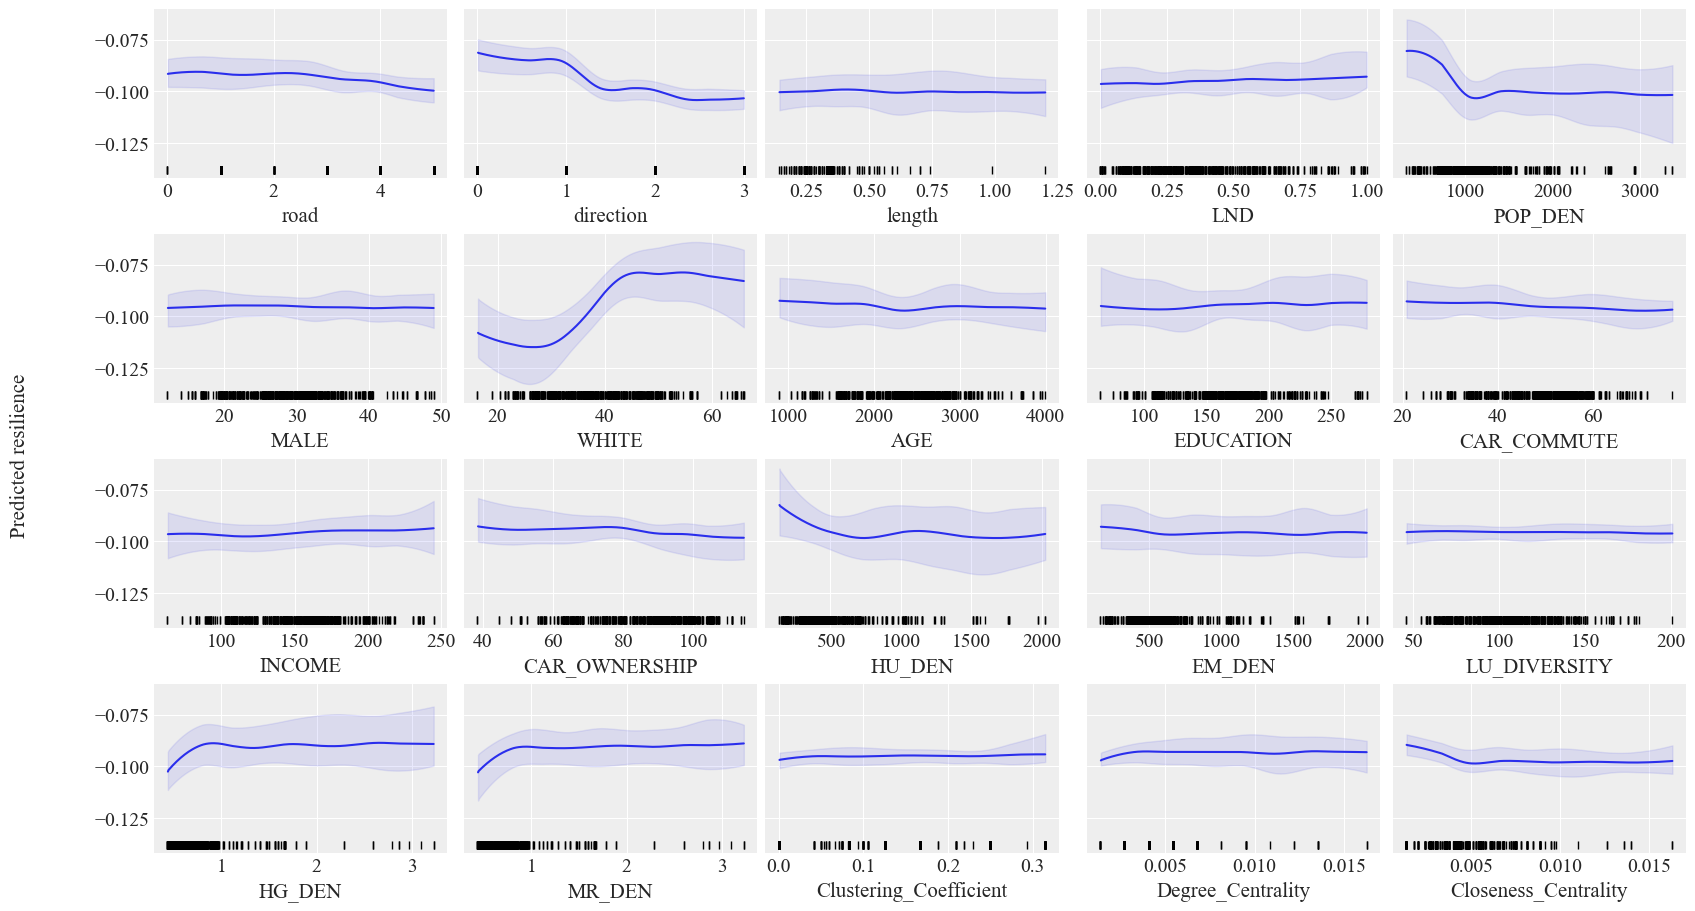

In [17]:
#plt.figure(figsize=(16,9))
pmb.plot_dependence(μ, X=X, Y=Y,grid=(4,5), figsize=(16,9))

array([<AxesSubplot:xlabel='road'>, <AxesSubplot:xlabel='direction'>,
       <AxesSubplot:xlabel='length'>, <AxesSubplot:xlabel='LND'>,
       <AxesSubplot:xlabel='POP_DEN'>, <AxesSubplot:xlabel='MALE'>,
       <AxesSubplot:xlabel='WHITE'>, <AxesSubplot:xlabel='AGE'>,
       <AxesSubplot:xlabel='EDUCATION'>,
       <AxesSubplot:xlabel='CAR_COMMUTE'>, <AxesSubplot:xlabel='INCOME'>,
       <AxesSubplot:xlabel='CAR_OWNERSHIP'>,
       <AxesSubplot:xlabel='HU_DEN'>, <AxesSubplot:xlabel='EM_DEN'>,
       <AxesSubplot:xlabel='LU_DIVERSITY'>, <AxesSubplot:xlabel='HG_DEN'>,
       <AxesSubplot:xlabel='MR_DEN'>,
       <AxesSubplot:xlabel='Clustering_Coefficient'>,
       <AxesSubplot:xlabel='Degree_Centrality'>,
       <AxesSubplot:xlabel='Closeness_Centrality'>], dtype=object)

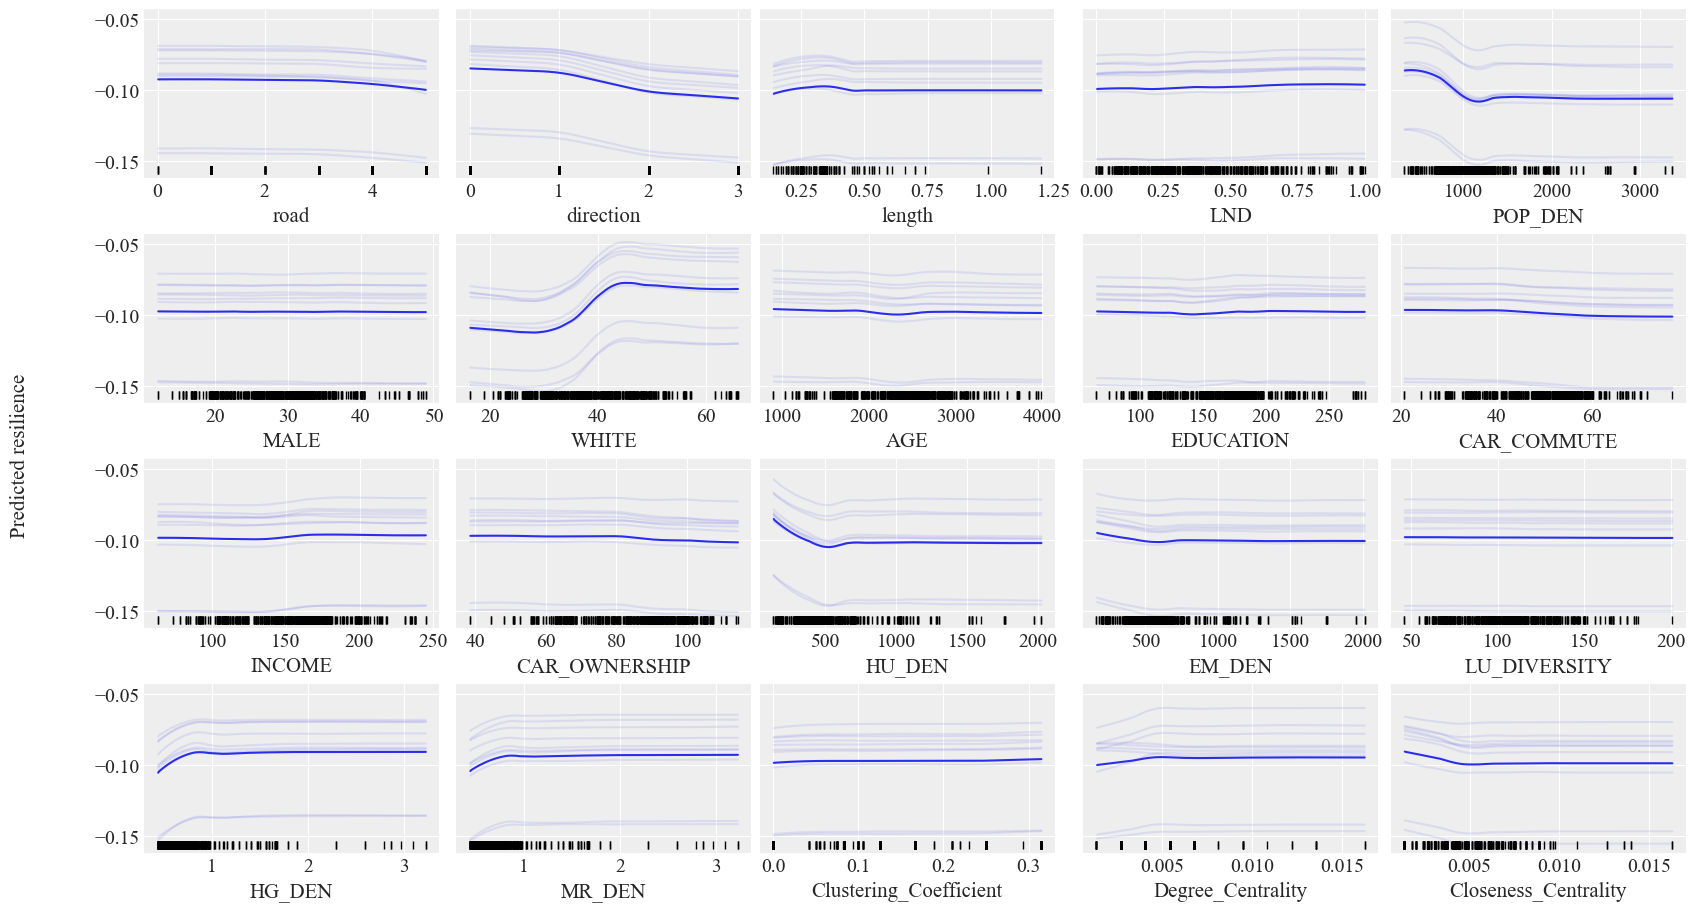

In [18]:
pmb.plot_dependence(μ, X=X, Y=Y, kind='ice', grid=(4,5), figsize=(16,9))

(array([-0.2 , -0.15, -0.1 , -0.05,  0.  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

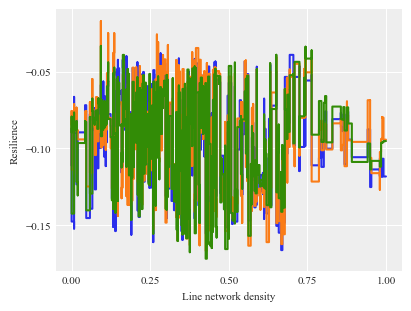

In [19]:
index = np.array(np.argsort(X["LND"]))
plt.figure(figsize=(4,3))
plt.step(np.sort(X["LND"]), idata_resilience.posterior["μ"].sel(chain=0, draw=[5,101,520])[:,index].T)
plt.xlabel('Line network density', fontsize = 8)
plt.ylabel("Resilience", fontsize = 8)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

(array([-0.004, -0.002,  0.   ,  0.002,  0.004,  0.006]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

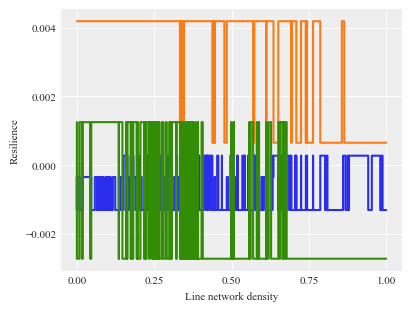

In [20]:
bart_trees = μ.owner.op.all_trees
plt.figure(figsize=(4,3))
for i in [0, 1, 2]:
    plt.step(np.sort(X["LND"]), [bart_trees[0][i].predict(X.iloc[j]) for j in np.array(np.argsort(X["LND"]))])
plt.xlabel('Line network density', fontsize = 8)
plt.ylabel("Resilience", fontsize = 8)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

(array([ 6,  4, 12,  8, 15,  1,  3, 18,  2,  7, 16, 13,  0, 10, 19, 11,  9,
         5, 17, 14], dtype=int64),
 array([<AxesSubplot:xlabel='covariables', ylabel='importance'>,
        <AxesSubplot:xlabel='number of covariables', ylabel='R²'>],
       dtype=object))

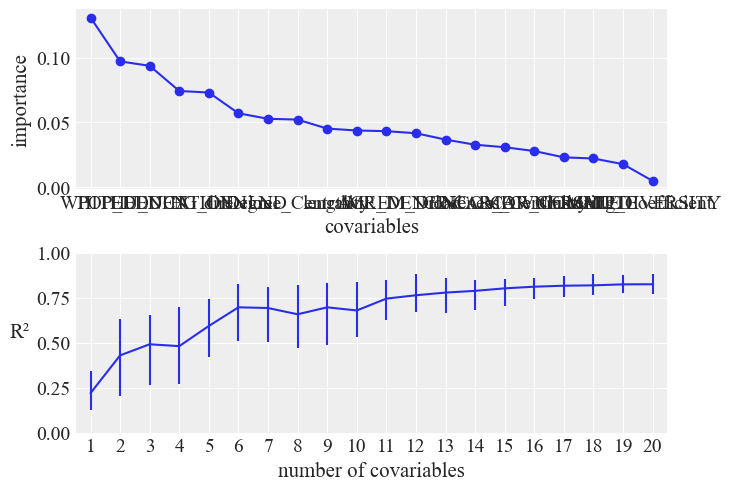

In [21]:
pmb.plot_variable_importance(idata_resilience, μ, X, samples=100)

#'WHITE', 'POP_DEN', 'HU_DEN', 'EDUCATION', 'HG_DEN', 'direction', 'LND', 'Degree_Centrality', 'length','AGE', 'MR_DEN','EM_DEN'
# 'road', 'INCOME', 'Closeness_Centrality', 'CAR_OWNERSHIP', 'CAR_COMMUTE','MALE','Clustering_Coefficient','LU_DIVERSITY' 

array([[<AxesSubplot:title={'center':'μ'}>,
        <AxesSubplot:title={'center':'μ'}>],
       [<AxesSubplot:title={'center':'σ'}>,
        <AxesSubplot:title={'center':'σ'}>],
       [<AxesSubplot:title={'center':'ε'}>,
        <AxesSubplot:title={'center':'ε'}>]], dtype=object)

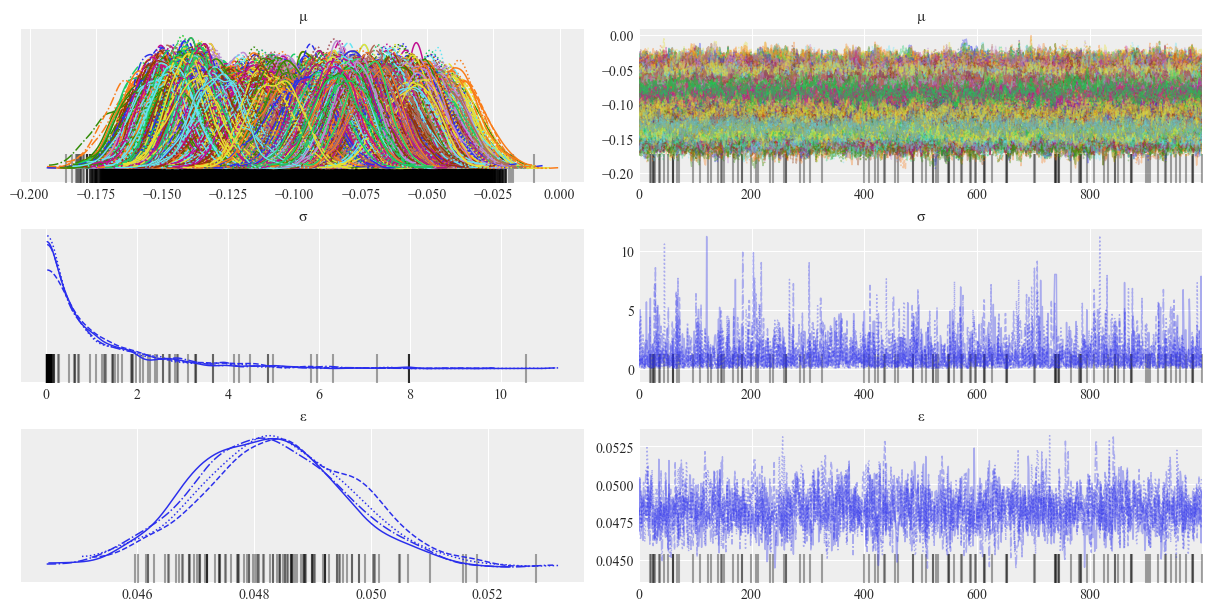

In [22]:
pm.plot_trace(idata_resilience)

Feature Ranking:
1. features 15 (0.143286)
2. features 16 (0.120492)
3. features 2 (0.090016)
4. features 3 (0.073770)
5. features 19 (0.068143)
6. features 11 (0.066060)
7. features 1 (0.061215)
8. features 6 (0.049341)
9. features 12 (0.047030)
10. features 17 (0.031768)
11. features 13 (0.030493)
12. features 7 (0.028856)
13. features 8 (0.028286)
14. features 10 (0.028054)
15. features 4 (0.027086)
16. features 14 (0.022859)
17. features 18 (0.021894)
18. features 9 (0.021523)
19. features 0 (0.020178)
20. features 5 (0.019651)


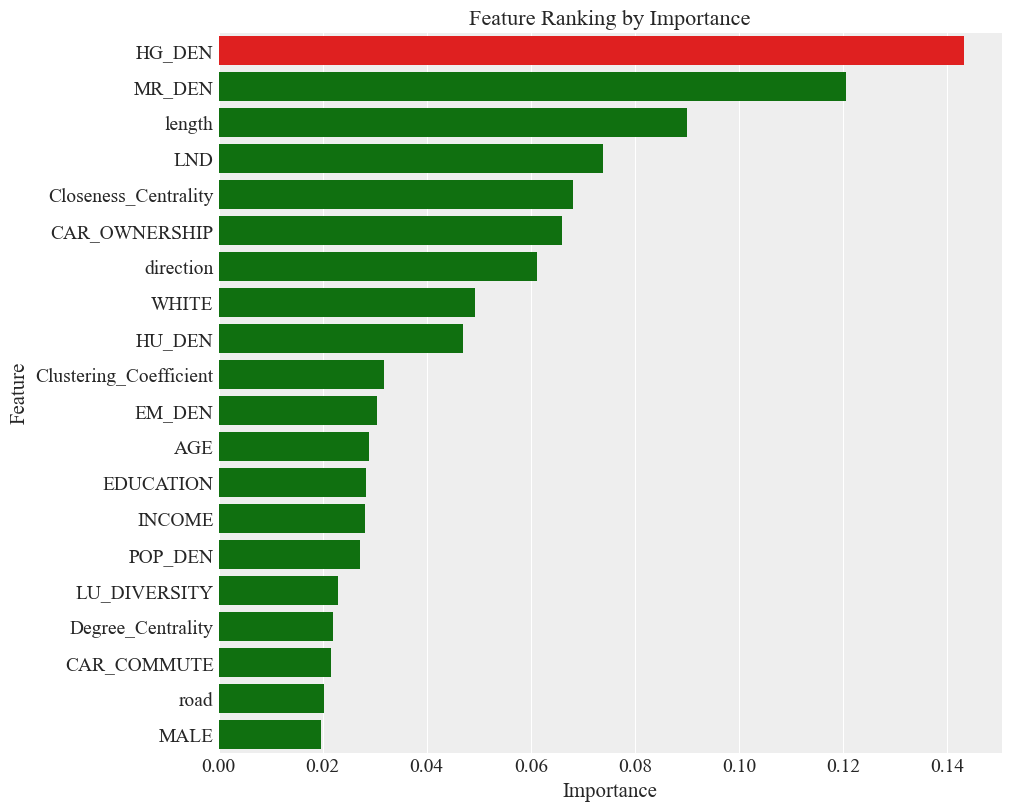

In [23]:
## Random Forest
# Feature selection based on random forest
from sklearn.ensemble import RandomForestRegressor as RRlf 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=100)

RF_model = RRlf(n_estimators = 100)
RF_model.fit(X_train, y_train)
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]

print('Feature Ranking:')
array_feature_RF = []
for f in range(X_train.shape[1]):
    print('%d. features %d (%f)'% (f+1, indices[f], importances[indices[f]]))
    array_feature_RF.append([X_train.columns[indices[f]], importances[indices[f]]])
array_feature_RF = np.array(array_feature_RF)
df_feature_RF = pd.DataFrame({'Feature': array_feature_RF[:, 0],
                             'Importance': array_feature_RF[:, 1]})

values = df_feature_RF.Importance.iloc[0:21]    
idx = df_feature_RF.Feature.iloc[0:21]  
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y = idx, x = values.astype('float'), palette = clrs).set(title = 'Feature Ranking by Importance')
plt.show()

Feature Importances :  [0.02602975 0.02438257 0.03707217 0.03031274 0.04581287 0.03583478
 0.08447529 0.12229787 0.06094474 0.02345946 0.04945694 0.05346984
 0.14222938 0.04940511 0.04749291 0.07857694 0.         0.02468756
 0.02365038 0.04040865]


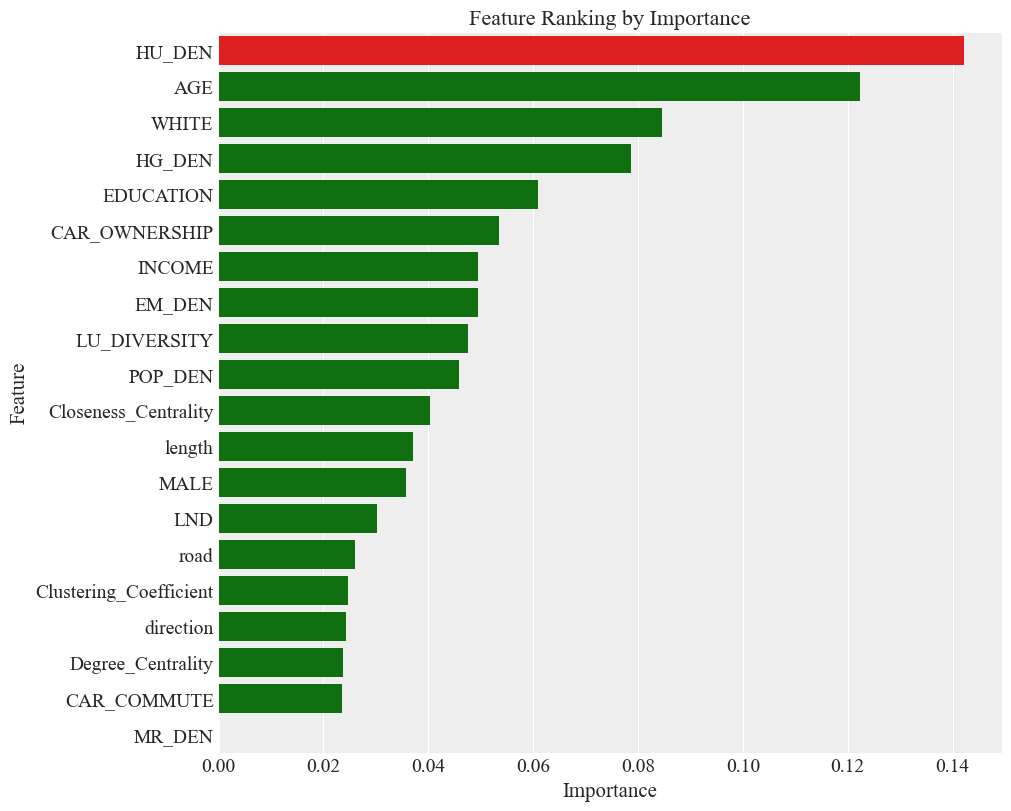

In [24]:
# Feature selection based on XGBoost
from xgboost import XGBRegressor
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBRegressor(random_state = 100)
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

xgboost_idx = np.flip(np.argsort(xgb_model.feature_importances_))
xgboost_feature_plot = X_train.columns[xgboost_idx].to_numpy()
xgboost_importance_plot = xgb_model.feature_importances_[xgboost_idx]
df_feature_xgboost = pd.DataFrame({'Feature': xgboost_feature_plot,
                             'Importance': xgboost_importance_plot})

values = df_feature_xgboost.Importance.iloc[0:21]  
idx = df_feature_xgboost.Feature.iloc[0:21]  
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y = idx, x = values.astype('float'), palette = clrs).set(title = 'Feature Ranking by Importance')
plt.show()